In [14]:
import time
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)
np.set_printoptions(precision=3)

In [15]:
%matplotlib inline

In [16]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr

def plot_scores(fscores, gscores, _lambda, log_scale=True):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if log_scale:
        ax.set_yscale('log')
    ax.plot(fscores)
    ax.plot(gscores)
    ax.plot(fscores + _lambda * gscores)
    ax.legend(['f', 'g', 'total'])

def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

def load_results(filename):
    data = np.load(filename)
    return data['Wb'], data['Hb'], data['Wl'], data['Hl'], data['fscores'], data['gscores'], data['_lambda']

In [17]:
mat = scipy.io.loadmat('urban/Urban.mat')
X = mat['X']
with open(f'urban/fullX.npz', 'wb') as fout:
    np.savez_compressed(fout, X=X)

In [18]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [19]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

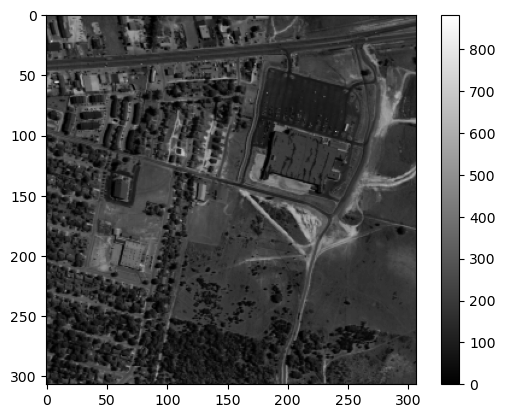

In [20]:
wavelength = 100
plt.imshow(X3d[wavelength, :, :], cmap='gray')
plt.colorbar()

### Small

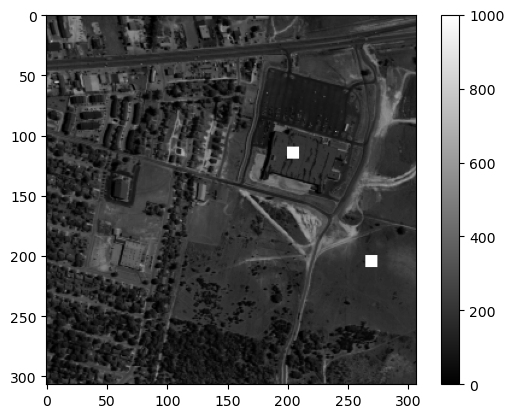

In [21]:
img = X3d[wavelength, :, :].copy()
# img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[110: 120, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [22]:
# trees3d = X3d[:, 285: 295, 120: 130] # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275] # (162, 10, 10)
asphalt3d = X3d[:, 110: 120, 200: 210] # (162, 10, 10)
smallX3d = np.hstack([grass3d, asphalt3d]) # (162, 20, 10)

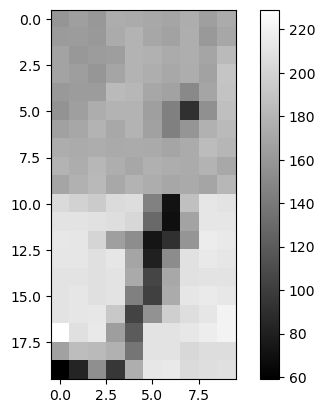

In [23]:
plt.imshow(smallX3d[wavelength, :, :], cmap='gray')
plt.colorbar()

In [24]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 200)
with open(f'urban/smallX.npz', 'wb') as fout:
    np.savez_compressed(fout, X=smallX)

In [37]:
rank = 4
_lambda = 2
iterations = 1000

In [38]:
from sklearn.decomposition import NMF
model = NMF(n_components=rank, init='random', random_state=0)
vanillaW = model.fit_transform(smallX)
vanillaH = model.components_

/Users/waqas/opt/anaconda3/envs/seminmf/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [40]:
m, n = smallX.shape
W_ini = np.random.rand(m, rank)
H_ini = np.random.rand(rank, n)

Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=iterations, scale_lambda=True, verbose=True)

Iteration: 1, f=9321.828222276028, g=2597.9488393841198,  total=5951288.521996802, False
Iteration: 2, f=7423.683556700231, g=196.2199403523019,  total=8831.816426770934, False
Iteration: 3, f=5876.836228333563, g=175.3651073067742,  total=19146.18144569387, False
Iteration: 4, f=4657.222663279729, g=168.21954729070035,  total=15931.971044124475, False
Iteration: 5, f=3766.208628857762, g=163.49899796516783,  total=12819.273519480033, False
Iteration: 6, f=3173.063425785108, g=160.86460170274395,  total=10584.113750872884, False
Iteration: 7, f=2803.314492821844, g=159.53280493643462,  total=9096.901810336409, False
Iteration: 8, f=2578.84094642956, g=158.88154882464357,  total=8162.5821542591475, False
Iteration: 9, f=2441.1759983565007, g=158.4985918193238,  total=7586.426174463782, False
Iteration: 10, f=2353.7075429487854, g=158.32370715711613,  total=7230.672435146074, False
Iteration: 11, f=2294.3043310561247, g=198.30100057173019,  total=8190.358297968232, False
Iteration: 12, f

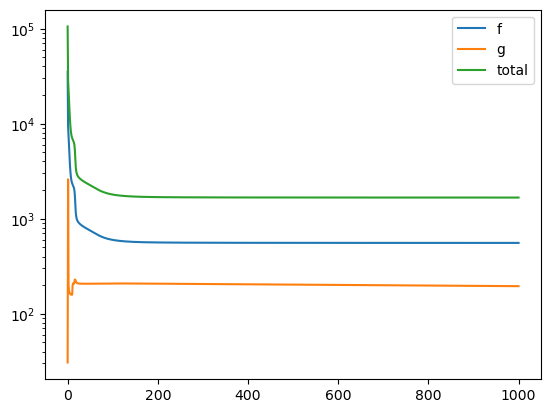

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + lambda_vals * gscores)
ax.legend(['f', 'g', 'total'])

In [43]:
normalized_similarity(Wl)

array([[0.   , 0.656, 0.254, 0.09 ],
       [0.326, 0.   , 0.335, 0.339],
       [0.211, 0.558, 0.   , 0.231],
       [0.086, 0.649, 0.265, 0.   ]])

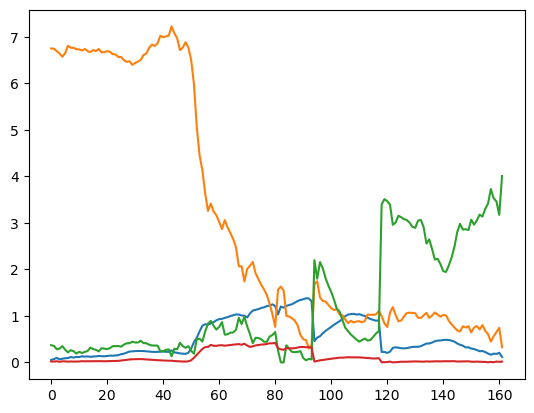

In [42]:
plt.plot(Wl)

### Medium

In [ ]:
img = X3d[wavelength, :, :].copy()
img[240: 290, 180: 230] = 1000 # trees
plt.imshow(img, cmap='gray')
plt.colorbar()

In [ ]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
medX = medX3d.reshape(m, -1, order='F') # (162, 2500)
with open(f'urban/medX.npz', 'wb') as fout:
    np.savez_compressed(fout, X=medX)

### Running tests

In [ ]:
def run_nmf_and_save(size, iterations, ranks, _lambdas):
    X = np.load(f'urban/{size}X.npz')['X']
    m, n = X.shape

    for rank in ranks:
        W_ini = zeros_mask(np.random.rand(m, rank))
        H_ini = zeros_mask(np.random.rand(rank, n))
        with open(f'urban/{size}_ini_r{rank}.npz', 'wb') as fout:
            np.savez_compressed(fout, W_ini=W_ini, H_ini=H_ini)

        for _lambda in _lambdas:
            start_time = time.time()
            Wb, Hb, Wl, Hl, fscores, gscores = nmf(X, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=iterations)
            runtime_min = (time.time() - start_time) / 60
            with open(f'urban/results/{size}_r{rank}_it{iterations}_l{str(_lambda).replace(".", "-")}.npz', 'wb') as fout:
                np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, _lambda=_lambda)
            print(f'NMF for size={size}, rank={rank}, lambda={_lambda} in {runtime_min} minutes.')

In [ ]:
# size = 'small'
# iterations = 1000
# ranks = [6, 8]
# _lambdas = [0.25, 0.5, 1, 2]
#
# run_nmf_and_save(size, iterations, ranks, _lambdas)

In [ ]:
# size = 'med'
# iterations = 1000
# ranks = [8, 10]
# _lambdas = [0.25, 0.5, 1]
#
# run_nmf_and_save(size, iterations, ranks, _lambdas)

In [ ]:
# size = 'full'
# iterations = 500
# ranks = [8, 10]
# _lambdas = [0.25, 0.5, 1]
#
# run_nmf_and_save(size, iterations, ranks, _lambdas)

In [ ]:


plt.plot(Wl[:, 0])
plt.plot(Wl[:, 1])
plt.plot(Wl[:, 2])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

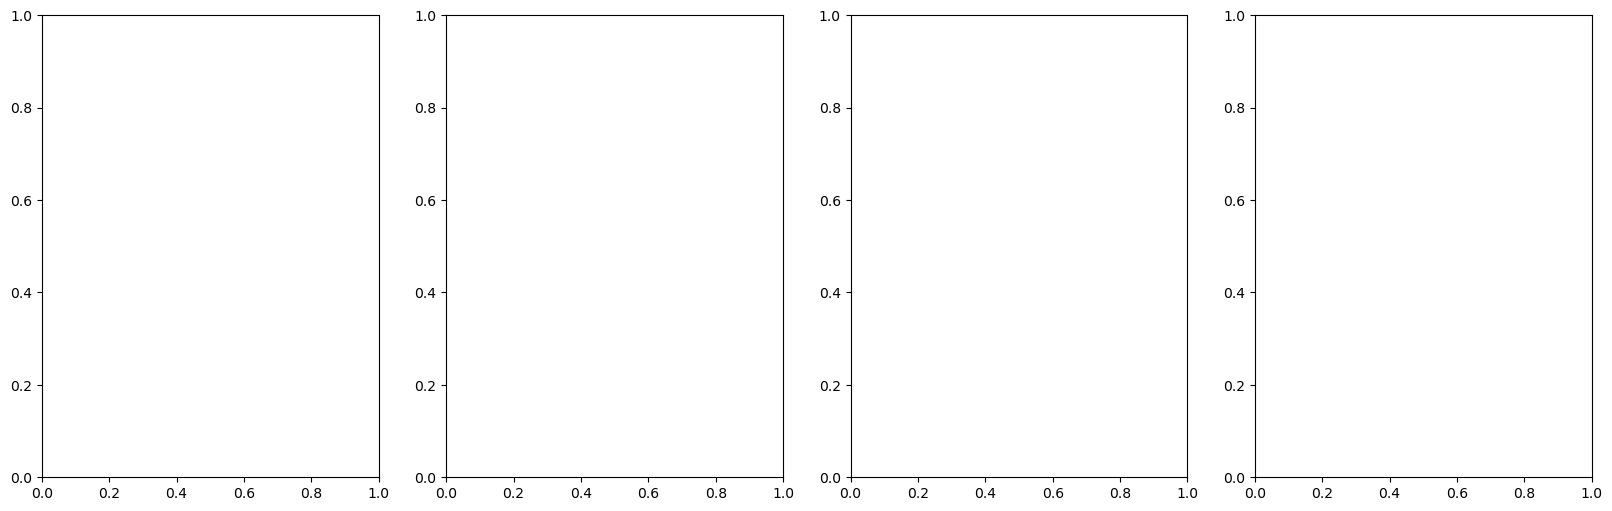

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
cnt = 0
for i in range(1):
    for j in range(4):
        axs[i, j].plot(Wl[:, cnt] / np.dot(Wl[:, cnt], Wl[:, cnt]))
        cnt += 1


In [ ]:
Wb, Hb, Wl, Hl, fscores, gscores, _lambda = load_results('urban/results/med_r10_it1000_l1.npz')
plot_scores(fscores, gscores, _lambda, log_scale=True)

In [30]:
for row in normalized_similarity(Wl):
    print(row)

[0.    0.434 0.174 0.391]
[0.346 0.    0.379 0.275]
[0.168 0.458 0.    0.375]
[0.348 0.307 0.346 0.   ]


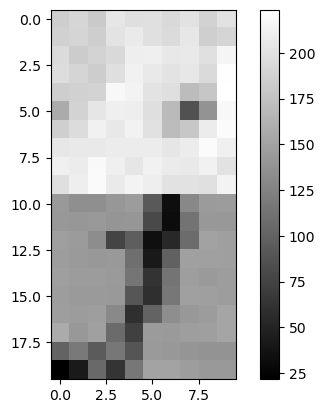

In [45]:
plt.imshow(Hl[0, :].reshape(20, 10, order='F'), cmap='gray')
plt.colorbar()

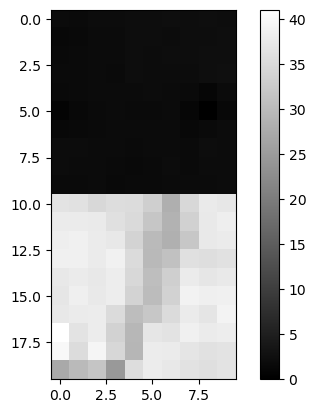

In [46]:
plt.imshow(Hl[1, :].reshape(20, 10, order='F'), cmap='gray')
plt.colorbar()